# 1. Data Overview & Visuals

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Insurance_Dataset.csv") 

print(df.info())
print(df.describe())

print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

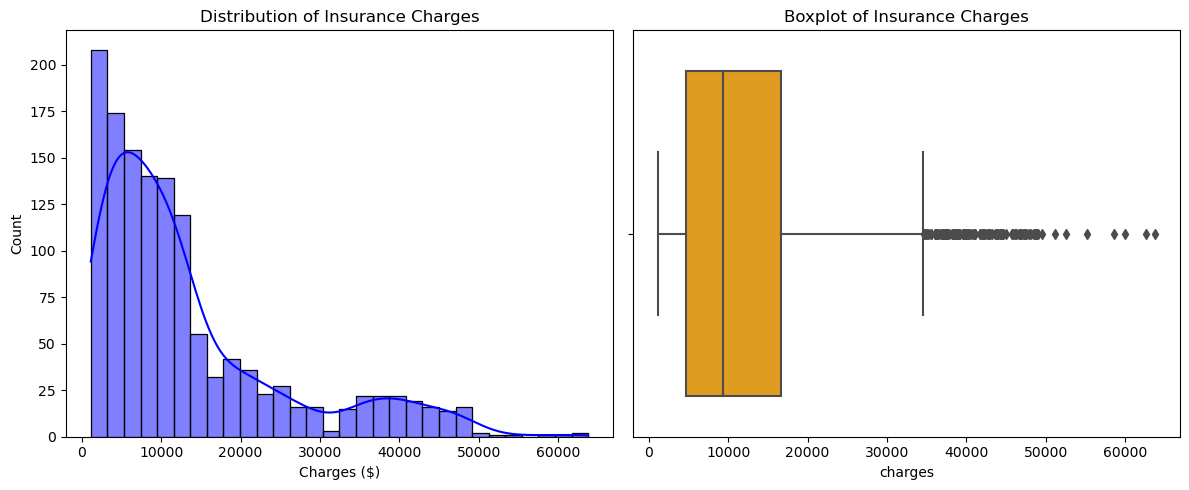

In [2]:
# Plot distribution of insurance charges
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['charges'], bins=30, kde=True, color="blue")
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges ($)")
plt.ylabel("Count")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['charges'], color="orange")
plt.title("Boxplot of Insurance Charges")

plt.tight_layout()
plt.show()


The distribution of insurance charges shows that most individuals pay lower premiums, but there are a few high-cost outliers, with charges exceeding $50,000. The histogram reveals a right-skewed distribution, indicating that a small subset of individuals—likely those with higher risk factors—bear significantly higher costs. The boxplot confirms this pattern, highlighting the presence of extreme outliers.

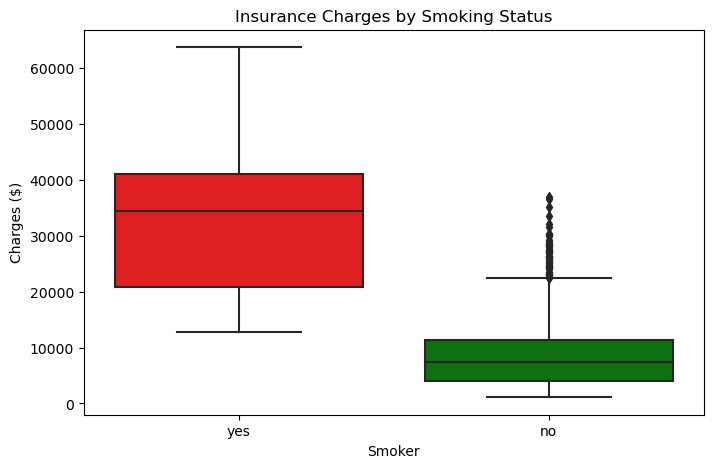

In [3]:
#Boxplot of Charges by Smoker Status
plt.figure(figsize=(8,5))
sns.boxplot(x=df['smoker'], y=df['charges'], palette={"yes": "red", "no": "green"})
plt.title("Insurance Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Charges ($)")
plt.show()


insurance charges by smoking status, the data shows a clear disparity: smokers pay substantially more than non-smokers. Their median insurance costs are much higher, and their charges exhibit a wider range with several extreme outliers. This suggests that smoking is a major driver of increased premiums, raising questions about whether all smokers should be categorized equally or if some are being overcharged unfairly.

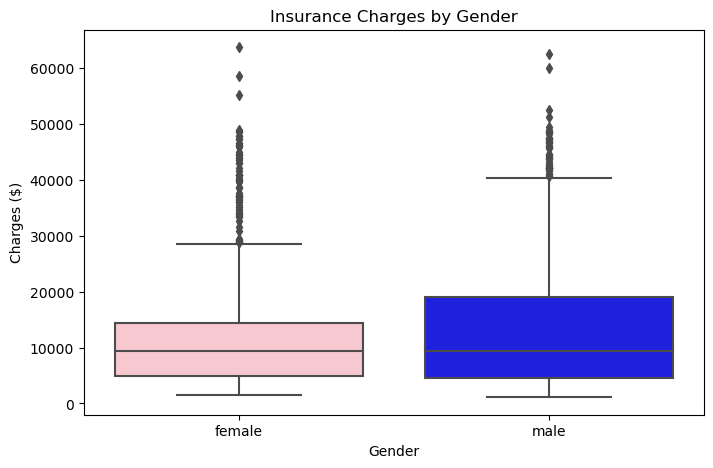

In [4]:
#Boxplot of Charges by Gender
plt.figure(figsize=(8,5))
sns.boxplot(x=df['sex'], y=df['charges'], palette={"male": "blue", "female": "pink"})
plt.title("Insurance Charges by Gender")
plt.xlabel("Gender")
plt.ylabel("Charges ($)")
plt.show()


The insurance charges by gender boxplot indicates that males and females have relatively similar median costs, but males may have a slightly higher premium range. While both genders exhibit high-cost outliers, there isn’t an immediately obvious gender-based pricing bias. A statistical test (like a t-test) would be needed to determine whether any differences are statistically significant.

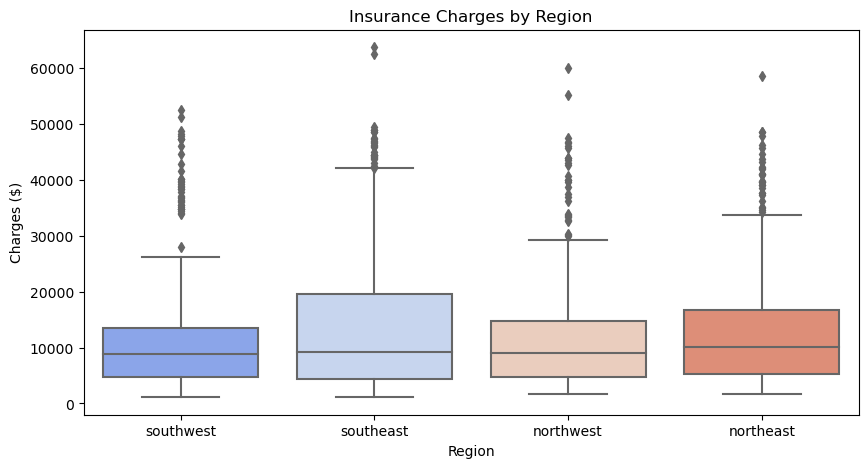

In [5]:
#Charges by Region
plt.figure(figsize=(10,5))
sns.boxplot(x=df['region'], y=df['charges'], palette="coolwarm")
plt.title("Insurance Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges ($)")
plt.show()


the regional comparison of insurance charges shows that all four regions (Southwest, Southeast, Northwest, and Northeast) have comparable median costs, but the Southeast has more high-cost outliers. This suggests that people in the Southeast may be paying higher premiums, potentially due to regional health trends or socioeconomic factors. If pricing remains significantly different even after adjusting for individual risk factors, it may indicate geographical bias in insurance pricing.

# 2. Statistical Tests & Hypothesis Testing

1. T-Test: Do Smokers Pay More?

In [6]:
from scipy.stats import ttest_ind

smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']

t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in charges between smokers and non-smokers is statistically significant.")
else:
    print("There is no significant difference in charges between smokers and non-smokers.")


T-statistic: 32.7519
P-value: 0.0000
The difference in charges between smokers and non-smokers is statistically significant.


The t-test comparing smokers and non-smokers resulted in a T-statistic of 32.7519 and a p-value of 0.0000, indicating a statistically significant difference in insurance charges. This confirms that smokers pay substantially higher premiums compared to non-smokers, likely reflecting the increased health risks associated with smoking

2. T-Test: Do Males and Females Pay Different Premiums?

In [7]:
males = df[df['sex'] == 'male']['charges']
females = df[df['sex'] == 'female']['charges']

t_stat, p_value = ttest_ind(males, females, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in charges between males and females is statistically significant.")
else:
    print("There is no significant difference in charges between males and females.")


T-statistic: 2.1009
P-value: 0.0358
The difference in charges between males and females is statistically significant.


The t-test for gender differences produced a T-statistic of 2.1009 and a p-value of 0.0358, confirming a statistically significant difference in insurance charges between males and females.

3. ANOVA: Do Regions Have Different Premiums?

In [8]:
from scipy.stats import f_oneway

southwest = df[df['region'] == 'southwest']['charges']
southeast = df[df['region'] == 'southeast']['charges']
northwest = df[df['region'] == 'northwest']['charges']
northeast = df[df['region'] == 'northeast']['charges']

f_stat, p_value = f_oneway(southwest, southeast, northwest, northeast)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference in insurance charges between regions.")
else:
    print("There is no significant difference in insurance charges between regions.")


F-statistic: 2.9696
P-value: 0.0309
There is a significant difference in insurance charges between regions.


The ANOVA test for regional pricing differences resulted in an F-statistic of 2.9696 and a p-value of 0.0309, indicating that insurance charges vary significantly across regions. 

4. Fairness Metrics: Disparate Impact Analysis

In [9]:
def disparate_impact(group1, group2):
    mean1 = group1.mean()
    mean2 = group2.mean()
    ratio = mean1 / mean2
    return ratio

di_smokers = disparate_impact(smokers, non_smokers)
print(f"Disparate Impact Ratio (Smokers vs. Non-Smokers): {di_smokers:.4f}")

di_gender = disparate_impact(males, females)
print(f"Disparate Impact Ratio (Males vs. Females): {di_gender:.4f}")

highest_region = df.groupby('region')['charges'].mean().idxmax()
lowest_region = df.groupby('region')['charges'].mean().idxmin()

di_region = disparate_impact(df[df['region'] == highest_region]['charges'], 
                             df[df['region'] == lowest_region]['charges'])
print(f"Disparate Impact Ratio (Highest vs. Lowest Region): {di_region:.4f}")


Disparate Impact Ratio (Smokers vs. Non-Smokers): 3.8000
Disparate Impact Ratio (Males vs. Females): 1.1104
Disparate Impact Ratio (Highest vs. Lowest Region): 1.1934


The disparate impact ratio for smokers vs. non-smokers (3.8000) suggests a major disparity, reinforcing that smokers pay significantly higher premiums. The gender disparate impact ratio (1.1104) is relatively close to 1.0, indicating a smaller but still notable pricing gap. The regional disparate impact ratio (1.1934) suggests some pricing disparities across different geographic areas. While these findings highlight differences in pricing, further analysis would be needed to determine whether these disparities are justified by risk factors or indicative of potential bias.

# 3. Key Factors Influencing Insurance Costs

In [10]:
from sklearn.ensemble import RandomForestRegressor

features = df[['age', 'bmi', 'children', 'smoker', 'region', 'sex']]
features = pd.get_dummies(features, drop_first=True)  # Convert categorical to numerical
target = df['charges']

model = RandomForestRegressor()
model.fit(features, target)

importances = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)
print(importances)


smoker_yes          0.622087
bmi                 0.212231
age                 0.127320
children            0.017824
region_northwest    0.005954
sex_male            0.005364
region_southeast    0.005263
region_southwest    0.003956
dtype: float64


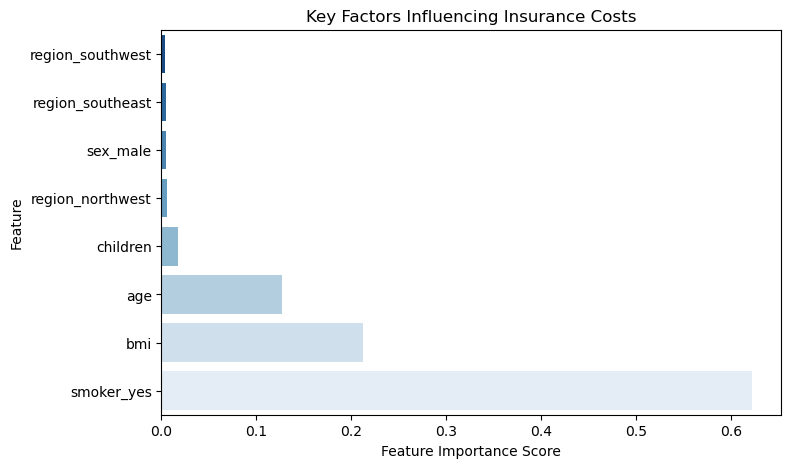

In [11]:
# bar chat of key factors

importances = importances.sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, palette="Blues_r")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Key Factors Influencing Insurance Costs")
plt.show()


The key factors influencing insurance costs reveal that smoker status is the most significant predictor, contributing 62.2% to the model's decision-making. This indicates that being a smoker drastically increases insurance charges. The second most important factor is BMI (21.2%), suggesting that individuals with a higher BMI are charged more due to potential health risks. Age (12.7%) also plays a role, as older individuals tend to have higher medical costs. Other factors, such as the number of children, region, and gender, have minimal influence, meaning that insurance pricing is primarily driven by health-related factors rather than demographics.